# Communication period optimization

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Helpers

In [2]:
def plot_time_acc_analysis(time_df, acc_df, n_worker_list=[7, 31, 63, 99, 127, 199, 215], n_comm_list=[1, 10, 50, 80, 100, 200, 400], 
                            figsize=(16, 8), accuracy_ticks=(85, 95, 1.0), title="", ax=None):
    if ax is None:
        fig, ax1 = plt.subplots(figsize=figsize)
    else:
        ax1 = ax
    legend_loc1 = "center left"
    legend_loc2 = "center right"
    lines1 = ax1.plot(n_worker_list, time_df.loc[n_worker_list, n_comm_list].values, linestyle="--")
    ax1.set_ylabel("Wall Time (seconds)")
    ax1.set_xlabel("No. of workers")
    ax2 = ax1.twinx()
    lines2 = ax2.plot(n_worker_list, acc_df.loc[n_worker_list, n_comm_list].values, linestyle='-', marker='o', linewidth=2.0)
    ax2.set_ylabel("Accuracy (%)")
    
    min_acc, max_acc, step_size = accuracy_ticks
    ax2.yaxis.set_ticks(np.arange(min_acc, max_acc, step_size))
    # leg = [f"{i}/400" for i in n_comm_list]
    ax1.legend(lines1, n_comm_list, loc=legend_loc1, title="Comm period: Time")
    ax2.legend(lines2, n_comm_list, loc=legend_loc2, title="Comm period: Accuracy")
    plt.title(title);

In [3]:
def speedup(time_df, mode="h"):
    
    speedup_df = None
    if mode == "h":
        speedup_df = pd.DataFrame(time_df.loc[:, 1].values[:, np.newaxis] / time_df.values, index=time_df.index, columns=time_df.columns)
    else:
        speedup_df = pd.DataFrame(time_df.loc[7].values[:, np.newaxis] / time_df.values.T, index=time_df.columns, columns=time_df.index)
        
    return speedup_df

## Data

In [4]:
data = np.array([
    [7, 1, 155.87, 90.54],
    [7, 10, 101.86, 90.52],
    [7, 50, 96.17, 90.52],
    [7, 80, 95.31, 90.51],
    [7, 100, 95.15, 90.52],
    [7, 200, 94.02, 90.50],
    [7, 400, 94.04, 90.51],
    [31, 1, 83.53, 90.6],
    [31, 10, 31.90, 90.57],
    [31, 50, 27.57, 90.33],
    [31, 80, 26.95, 90.25],
    [31, 100, 26.86, 90.21],
    [31, 200, 26.53, 90.03],
    [31, 400, 25.75, 89.92],
    [63, 1, 70.65, 90.47],
    [63, 10, 21.62, 90.43],
    [63, 50, 17.79, 90.17],
    [63, 80, 17.70, 90.04],
    [63, 100, 17.52, 89.96],
    [63, 200, 17.44, 89.68],
    [63, 400, 17.09, 89.39],
    [99, 1, 81, 90.4],
    [99, 10, 17.4, 90.38],
    [99, 50, 13.04, 89.97],
    [99, 80, 12.5, 89.83],
    [99, 100, 12.85, 89.75],
    [99, 200, 12.55, 89.21],
    [99, 400, 12.25, 88.6],
    [127, 1, 101.92, 90.36],
    [127, 10, 16.09, 90.25],
    [127, 50, 11.39, 89.79],
    [127, 80, 10.78, 89.51],
    [127, 100, 10.74, 89.33],
    [127, 200, 10.22, 88.87],
    [127, 400, 10.25, 88.23],
    [199, 1, 135.14, 90.27],
    [199, 10, 15, 90.0],
    [199, 50, 8.86, 89.71],
    [199, 80, 8.80, 89.00],
    [199, 100, 8.5, 88.79],
    [199, 200, 7.80, 88.12],
    [199, 400, 8.3, 87.25],
    [215, 1, 141.42, 90.36],
    [215, 10, 15.96, 90.09],
    [215, 50, 9.18, 89.3],
    [215, 80, 8.38, 88.91],
    [215, 100, 8.25, 88.73],
    [215, 200, 8.24, 87.95],
    [215, 400, 7.70, 87.09]
])

In [5]:
results = pd.DataFrame(data, columns=["N_WORKERS", "COMM_PERIOD", "TIME", "ACCURACY"])
results.loc[:, "N_WORKERS"] = results.loc[:, "N_WORKERS"].astype(int)
results.loc[:, "COMM_PERIOD"] = results.loc[:, "COMM_PERIOD"].astype(int)
results.loc[:, "DATASET"] = "MNIST"
results.head()

,N_WORKERS,COMM_PERIOD,TIME,ACCURACY,DATASET
0,7,1,155.87,90.54,MNIST
1,7,10,101.86,90.52,MNIST
2,7,50,96.17,90.52,MNIST
3,7,80,95.31,90.51,MNIST
4,7,100,95.15,90.52,MNIST


In [6]:
# results.to_csv("../data/mnist_results.csv")

In [19]:
fashion_data = pd.read_csv("../data/output/fashion_mnist_results.csv")
fashion_data.loc[:, "N_WORKERS"] = fashion_data.loc[:, "N_WORKERS"] - 1
fashion_data = fashion_data.sort_values(by=["N_WORKERS", "COMM_PERIOD"], ascending=[True, True]).reset_index(drop=True)
fashion_data.loc[:, "DATASET"] = "FASHION-MNIST"
fashion_data.head()

,N_WORKERS,COMM_PERIOD,TIME,ACCURACY,DATASET
0,1,400,162.478393,82.73,FASHION-MNIST
1,7,1,156.761817,82.70,FASHION-MNIST
2,7,10,101.950370,82.69,FASHION-MNIST
3,7,50,95.892139,82.63,FASHION-MNIST
4,7,80,95.397447,82.63,FASHION-MNIST


### Note*:

COMM_FREQ_COUNT is the number of times that we communicated. For eg. If we have a total of 400 iterations and the period that we communicated is every 10th iteration then COMM_FREQ_COUNT would be 400 / 10 = 40. For a period of communication of every 400th iterations for a total of 400 iterations then the COMM_FREQ_COUNT would be 400 / 400 = 1

In [20]:
results.loc[:, "COMM_PERIOD_COUNT"] = 400 / results.loc[:, "COMM_PERIOD"]

In [21]:
time_pivot = results.pivot_table(values="TIME", index="N_WORKERS", columns="COMM_PERIOD")
time_pivot

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
7,155.87,101.86,96.17,95.31,95.15,94.02,94.04
31,83.53,31.90,27.57,26.95,26.86,26.53,25.75
63,70.65,21.62,17.79,17.70,17.52,17.44,17.09
99,81.00,17.40,13.04,12.50,12.85,12.55,12.25
127,101.92,16.09,11.39,10.78,10.74,10.22,10.25
199,135.14,15.00,8.86,8.80,8.50,7.80,8.30
215,141.42,15.96,9.18,8.38,8.25,8.24,7.70


In [22]:
f_time_pivot = fashion_data.pivot_table(values="TIME", index="N_WORKERS", columns="COMM_PERIOD")
f_time_pivot = f_time_pivot.fillna(f_time_pivot.loc[1, 400])
f_time_pivot

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
1,162.478393,162.478393,162.478393,162.478393,162.478393,162.478393,162.478393
7,156.761817,101.950370,95.892139,95.397447,94.649447,94.286817,94.490093
31,83.097684,32.462636,27.834111,26.856076,27.017211,26.625023,26.311905
63,70.212254,21.966976,18.200409,17.855352,17.554588,17.785563,17.639698
99,81.115174,17.814844,13.714152,12.721571,12.336116,11.918386,12.762597
127,101.491160,16.397711,11.502700,11.081405,10.689734,10.604607,10.715541
199,134.888994,15.636256,9.194627,8.653171,8.877525,8.155414,8.203453
215,140.504786,15.724007,9.266356,8.423150,8.613775,8.030328,7.742520


In [23]:
acc_pivot = results.pivot_table(values="ACCURACY", index="N_WORKERS", columns="COMM_PERIOD")
acc_pivot

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
7,90.54,90.52,90.52,90.51,90.52,90.50,90.51
31,90.60,90.57,90.33,90.25,90.21,90.03,89.92
63,90.47,90.43,90.17,90.04,89.96,89.68,89.39
99,90.40,90.38,89.97,89.83,89.75,89.21,88.60
127,90.36,90.25,89.79,89.51,89.33,88.87,88.23
199,90.27,90.00,89.71,89.00,88.79,88.12,87.25
215,90.36,90.09,89.30,88.91,88.73,87.95,87.09


In [24]:
f_acc_pivot = fashion_data.pivot_table(values="ACCURACY", index="N_WORKERS", columns="COMM_PERIOD")
f_acc_pivot = f_acc_pivot.fillna(f_acc_pivot.loc[1, 400])
f_acc_pivot

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
1,82.73,82.73,82.73,82.73,82.73,82.73,82.73
7,82.70,82.69,82.63,82.63,82.62,82.66,82.66
31,82.68,82.68,82.67,82.64,82.62,82.55,82.45
63,82.72,82.68,82.59,82.51,82.46,82.34,82.08
99,82.63,82.67,82.52,82.41,82.41,82.03,81.55
127,82.65,82.59,82.44,82.37,82.30,81.74,81.31
199,82.59,82.64,82.27,81.99,81.78,81.31,80.69
215,82.63,82.64,82.27,81.92,81.78,81.28,80.52


In [25]:
diff_acc = acc_pivot - acc_pivot.loc[7, 400]

In [26]:
acc_pivot.columns.tolist()

[1, 10, 50, 80, 100, 200, 400]

#### For datasize of (60000, 784) for mnist and fashion-mnist

Using straight averaging

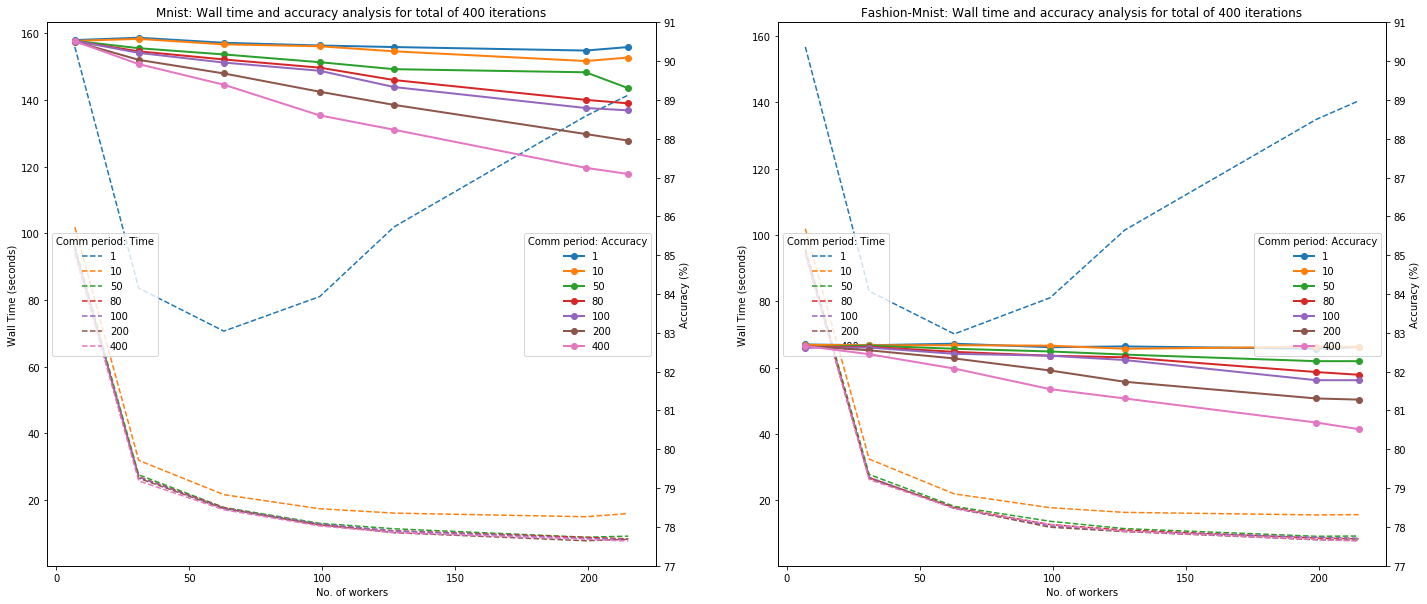

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))
plot_time_acc_analysis(time_pivot, acc_pivot, accuracy_ticks=(77, 92, 1), title="Mnist: Wall time and accuracy analysis for total of 400 iterations", ax=ax[0])
plot_time_acc_analysis(f_time_pivot, f_acc_pivot, accuracy_ticks=(77, 92, 1), title="Fashion-Mnist: Wall time and accuracy analysis for total of 400 iterations", ax=ax[1])

### Speedup analysis

In [28]:
time_pivot

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
7,155.87,101.86,96.17,95.31,95.15,94.02,94.04
31,83.53,31.90,27.57,26.95,26.86,26.53,25.75
63,70.65,21.62,17.79,17.70,17.52,17.44,17.09
99,81.00,17.40,13.04,12.50,12.85,12.55,12.25
127,101.92,16.09,11.39,10.78,10.74,10.22,10.25
199,135.14,15.00,8.86,8.80,8.50,7.80,8.30
215,141.42,15.96,9.18,8.38,8.25,8.24,7.70


#### Comm period speedup analysis

In [29]:
speedup_h = speedup(time_pivot)
speedup_h

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
7,1.0,1.530238,1.620776,1.635400,1.638150,1.657839,1.657486
31,1.0,2.618495,3.029742,3.099443,3.109829,3.148511,3.243883
63,1.0,3.267808,3.971332,3.991525,4.032534,4.051032,4.133996
99,1.0,4.655172,6.211656,6.480000,6.303502,6.454183,6.612245
127,1.0,6.334369,8.948200,9.454545,9.489758,9.972603,9.943415
199,1.0,9.009333,15.252822,15.356818,15.898824,17.325641,16.281928
215,1.0,8.860902,15.405229,16.875895,17.141818,17.162621,18.366234


In [30]:
f_speedup_h = speedup(f_time_pivot)
f_speedup_h

COMM_PERIOD,1,10,50,80,100,200,400
N_WORKERS,,,,,,,
1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.0,1.537629,1.634772,1.643250,1.656236,1.662606,1.659029
31,1.0,2.559795,2.985462,3.094186,3.075731,3.121037,3.158178
63,1.0,3.196264,3.857729,3.932281,3.999653,3.947711,3.980355
99,1.0,4.553235,5.914706,6.376192,6.575422,6.805886,6.355695
127,1.0,6.189349,8.823247,9.158691,9.494264,9.570478,9.471399
199,1.0,8.626681,14.670415,15.588389,15.194437,16.539810,16.442953
215,1.0,8.935686,15.162895,16.680789,16.311639,17.496768,18.147165


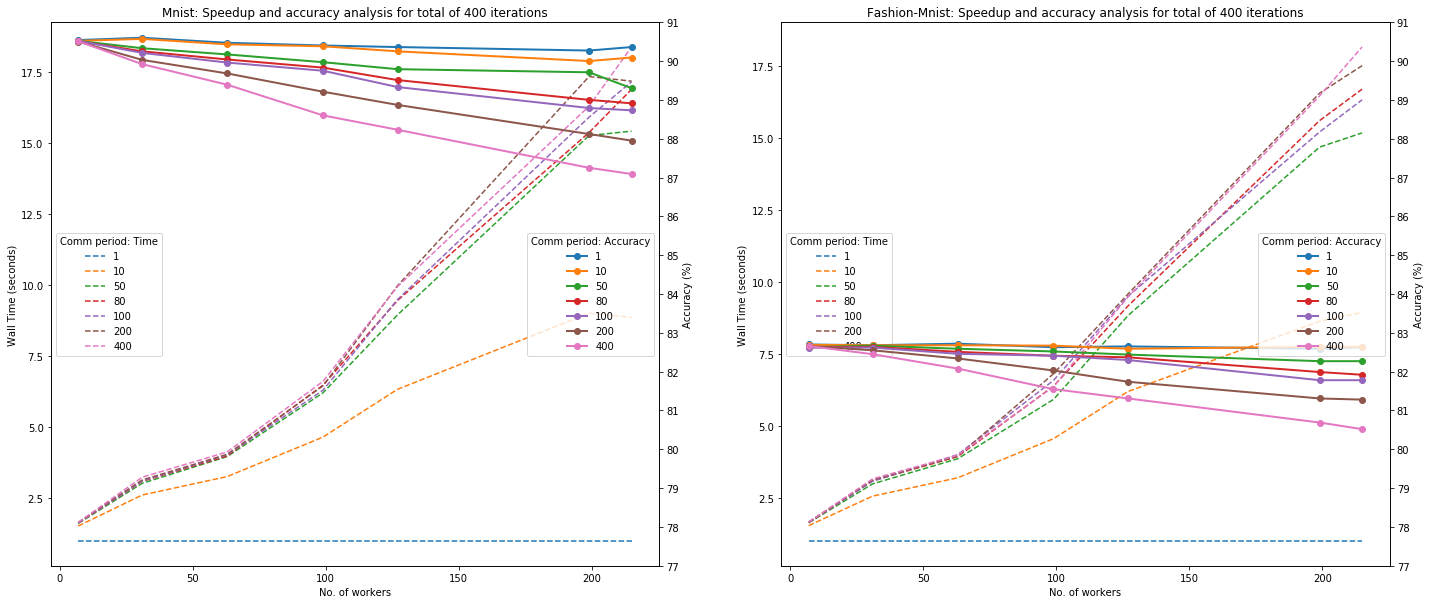

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))
plot_time_acc_analysis(speedup_h, acc_pivot, accuracy_ticks=(77, 92, 1), title="Mnist: Speedup and accuracy analysis for total of 400 iterations", ax=ax[0])
plot_time_acc_analysis(f_speedup_h, f_acc_pivot, accuracy_ticks=(77, 92, 1), title="Fashion-Mnist: Speedup and accuracy analysis for total of 400 iterations", ax=ax[1])

There is a 18x speedup when communicating just once, and 17x speedup when communicating every 100th iteration. 

#### No. of workers speedup analysis

In [32]:
speedup_v = speedup(time_pivot, mode="v")
speedup_v

N_WORKERS,7,31,63,99,127,199,215
COMM_PERIOD,,,,,,,
1,1.0,1.866036,2.206228,1.924321,1.529337,1.153396,1.102178
10,1.0,3.193103,4.711378,5.854023,6.330640,6.790667,6.382206
50,1.0,3.488212,5.405846,7.375000,8.443371,10.854402,10.476035
80,1.0,3.536549,5.384746,7.624800,8.841373,10.830682,11.373508
100,1.0,3.542442,5.430936,7.404669,8.859404,11.194118,11.533333
200,1.0,3.543913,5.391055,7.491633,9.199609,12.053846,11.410194
400,1.0,3.652039,5.502633,7.676735,9.174634,11.330120,12.212987


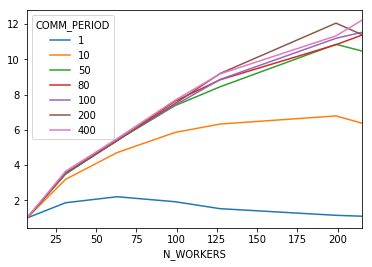

In [33]:
speedup_v.T.plot()

When communication every iteration, there is not much speedup with the increase in number of workers. However, if we just communicate once out of 400 iterations, there is a 12x speedup for 215 workers compared to the serial implementation. This behaviour is similar if we communicate every 100th iteration with a 11.5x speedup.

## Overlap results

In [34]:
mnist_overlap = pd.read_csv("../data/output/mnist-results-overlap.csv")

In [35]:
mnist_overlap.head(10)

,N_WORKERS,COMM_PERIOD,TIME,ACCURACY,OVERLAP
0,16,1,15.975141,86.13,0.0
1,16,1,16.849420,86.29,0.4
2,16,1,18.140218,86.29,0.8
3,16,10,7.403856,86.12,0.0
4,16,10,9.759100,86.29,0.4
5,16,10,11.984868,86.36,0.8
6,16,20,7.077538,86.12,0.0
7,16,20,9.375863,86.25,0.4
8,16,20,11.771325,86.39,0.8
9,16,40,7.804751,86.19,0.0


In [36]:
time_overlap_pivot = mnist_overlap.pivot_table(values="TIME", index="N_WORKERS", columns=["COMM_PERIOD", "OVERLAP"])
time_overlap_pivot

COMM_PERIOD        1                                10                         \
OVERLAP            0.0        0.4        0.8        0.0        0.4        0.8   
N_WORKERS                                                                       
8            17.210551  21.487015  25.625124  11.780788  16.035784  20.158040   
16           15.975141  16.849420  18.140218   7.403856   9.759100  11.984868   
32           19.247735  20.878171  23.610446   6.097701   7.777934   9.221584   
64           22.322847  29.500941  33.525853   5.809648   6.288394   7.602529   

COMM_PERIOD        20                               40                         \
OVERLAP            0.0        0.4        0.8        0.0        0.4        0.8   
N_WORKERS                                                                       
8            11.454207  15.649399  19.840704  13.419973  18.384064  23.190774   
16            7.077538   9.375863  11.771325   7.804751  10.364799  12.985963   
32            5.433597   6.786178   8.395383   5.442882   7.136898   8.725446   
64            4.375286   5.396891   6.504640   4.282843   5.366429   6.475087   

COMM_PERIOD        80                               100                        
OVERLAP            0.0        0.4        0.8        0.0        0.4        0.8  
N_WORKERS                                                                      
8            17.362270  23.922885  30.644104  11.262548  15.524620  19.734402  
16            9.540637  13.141877  16.372380   6.697726   9.145191  11.496845  
32            6.243352   8.255326  10.351678   4.774168   6.220434   7.641300  
64            4.538051   5.760224   7.187536   3.702456   4.590924   5.711209

In [37]:
acc_overlap_pivot = mnist_overlap.pivot_table(values="ACCURACY", index="N_WORKERS", columns=["COMM_PERIOD", "OVERLAP"])
acc_overlap_pivot

COMM_PERIOD    1                    10                   20                 \
OVERLAP        0.0    0.4    0.8    0.0    0.4    0.8    0.0    0.4    0.8   
N_WORKERS                                                                    
8            86.32  86.35  86.50  86.30  86.35  86.50  86.32  86.35  86.51   
16           86.13  86.29  86.29  86.12  86.29  86.36  86.12  86.25  86.39   
32           85.37  85.76  85.99  85.38  85.71  85.97  85.39  85.68  85.98   
64           84.30  84.95  85.26  84.26  84.88  85.22  84.24  84.85  85.19   

COMM_PERIOD    40                   80                   100                
OVERLAP        0.0    0.4    0.8    0.0    0.4    0.8    0.0    0.4    0.8  
N_WORKERS                                                                   
8            86.27  86.41  86.50  86.29  86.34  86.44  86.30  86.36  86.49  
16           86.19  86.23  86.38  86.22  86.32  86.38  86.07  86.30  86.35  
32           85.57  85.80  86.08  85.80  86.00  86.20  85.25  85.68  85.93  
64           84.55  85.10  85.46  84.85  85.38  85.73  84.16  84.70  85.07

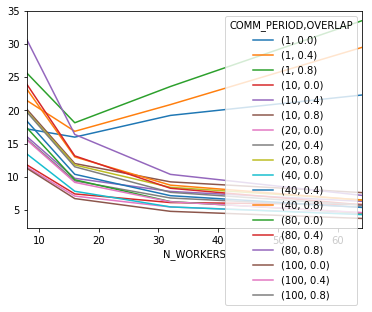

In [38]:
time_overlap_pivot.plot()

In [48]:
n_workers = mnist_overlap.N_WORKERS.sort_values().unique() - 1
overlaps = mnist_overlap.OVERLAP.sort_values().unique()

In [64]:
mnist_overlap.head()

,N_WORKERS,COMM_PERIOD,TIME,ACCURACY,OVERLAP
0,16,1,15.975141,86.13,0.0
1,16,1,16.849420,86.29,0.4
2,16,1,18.140218,86.29,0.8
3,16,10,7.403856,86.12,0.0
4,16,10,9.759100,86.29,0.4


In [66]:
mnist_overlap.loc[:, "BATCH_SIZE"] = (
    np.ceil(
        (1 + mnist_overlap.loc[:, "OVERLAP"]) * (60000 // (mnist_overlap.loc[:, "N_WORKERS"] - 1))
    ).astype(int)
)

In [83]:
mnist_overlap.pivot_table(
    values=["BATCH_SIZE", "TIME", "ACCURACY"],
    index=["N_WORKERS", "COMM_PERIOD"],
    columns=["OVERLAP"]
)

ACCURACY               BATCH_SIZE                \
OVERLAP                    0.0    0.4    0.8        0.0    0.4    0.8   
N_WORKERS COMM_PERIOD                                                   
8         1              86.32  86.35  86.50       8571  12000  15428   
          10             86.30  86.35  86.50       8571  12000  15428   
          20             86.32  86.35  86.51       8571  12000  15428   
          40             86.27  86.41  86.50       8571  12000  15428   
          80             86.29  86.34  86.44       8571  12000  15428   
          100            86.30  86.36  86.49       8571  12000  15428   
16        1              86.13  86.29  86.29       4000   5600   7200   
          10             86.12  86.29  86.36       4000   5600   7200   
          20             86.12  86.25  86.39       4000   5600   7200   
          40             86.19  86.23  86.38       4000   5600   7200   
          80             86.22  86.32  86.38       4000   5600   7200   
          100            86.07  86.30  86.35       4000   5600   7200   
32        1              85.37  85.76  85.99       1935   2709   3483   
          10             85.38  85.71  85.97       1935   2709   3483   
          20             85.39  85.68  85.98       1935   2709   3483   
          40             85.57  85.80  86.08       1935   2709   3483   
          80             85.80  86.00  86.20       1935   2709   3483   
          100            85.25  85.68  85.93       1935   2709   3483   
64        1              84.30  84.95  85.26        952   1333   1714   
          10             84.26  84.88  85.22        952   1333   1714   
          20             84.24  84.85  85.19        952   1333   1714   
          40             84.55  85.10  85.46        952   1333   1714   
          80             84.85  85.38  85.73        952   1333   1714   
          100            84.16  84.70  85.07        952   1333   1714   

                            TIME                        
OVERLAP                      0.0        0.4        0.8  
N_WORKERS COMM_PERIOD                                   
8         1            17.210551  21.487015  25.625124  
          10           11.780788  16.035784  20.158040  
          20           11.454207  15.649399  19.840704  
          40           13.419973  18.384064  23.190774  
          80           17.362270  23.922885  30.644104  
          100          11.262548  15.524620  19.734402  
16        1            15.975141  16.849420  18.140218  
          10            7.403856   9.759100  11.984868  
          20            7.077538   9.375863  11.771325  
          40            7.804751  10.364799  12.985963  
          80            9.540637  13.141877  16.372380  
          100           6.697726   9.145191  11.496845  
32        1            19.247735  20.878171  23.610446  
          10            6.097701   7.777934   9.221584  
          20            5.433597   6.786178   8.395383  
          40            5.442882   7.136898   8.725446  
          80            6.243352   8.255326  10.351678  
          100           4.774168   6.220434   7.641300  
64        1            22.322847  29.500941  33.525853  
          10            5.809648   6.288394   7.602529  
          20            4.375286   5.396891   6.504640  
          40            4.282843   5.366429   6.475087  
          80            4.538051   5.760224   7.187536  
          100           3.702456   4.590924   5.711209

 ### Fashion mnist overlap

In [39]:
f_mnist_overlap = pd.read_csv("../data/output/f-mnist-results-overlap.csv")

In [40]:
time_overlap_pivot_f = f_mnist_overlap.pivot_table(values="TIME", index="N_WORKERS", columns=["COMM_PERIOD", "OVERLAP"])
time_overlap_pivot_f

COMM_PERIOD        1                                10                         \
OVERLAP            0.0        0.4        0.8        0.0        0.4        0.8   
N_WORKERS                                                                       
8            17.346314  21.560407  25.818524  11.810709  15.907856  19.966623   
16           15.648651  17.015598  18.867603   7.560770   9.726076  12.283472   
32           19.931152  21.144714  23.819991   6.300468   7.791208   9.214313   
64           22.358569  27.213766  33.628414   5.259718   6.756576   7.746954   

COMM_PERIOD        20                               40                         \
OVERLAP            0.0        0.4        0.8        0.0        0.4        0.8   
N_WORKERS                                                                       
8            11.471729  15.698167  19.836191  13.296629  18.256537  23.342678   
16            7.121204   9.495867  11.672209   8.006921  10.611363  13.451306   
32            5.383970   6.967591   8.341687   5.576878   7.111277   8.897077   
64            4.392373   5.375844   6.454005   4.233657   5.408359   6.517342   

COMM_PERIOD        80                               100                        
OVERLAP            0.0        0.4        0.8        0.0        0.4        0.8  
N_WORKERS                                                                      
8            17.598859  23.728568  30.894141  11.334828  15.705193  20.075614  
16            9.773548  13.537987  16.594510   6.708693   9.025247  11.277209  
32            6.312705   8.291718  10.480122   4.818607   6.313327   7.863366  
64            4.524745   5.869050   7.223799   3.673182   4.695032   5.833020

In [41]:
acc_overlap_pivot_f = f_mnist_overlap.pivot_table(values="ACCURACY", index="N_WORKERS", columns=["COMM_PERIOD", "OVERLAP"])
acc_overlap_pivot_f

COMM_PERIOD    1                    10                   20                 \
OVERLAP        0.0    0.4    0.8    0.0    0.4    0.8    0.0    0.4    0.8   
N_WORKERS                                                                    
8            80.45  80.74  80.86  80.43  80.71  80.90  80.43  80.72  80.88   
16           79.78  80.22  80.36  79.79  80.21  80.35  79.77  80.20  80.35   
32           78.35  79.21  79.54  78.34  79.20  79.49  78.32  79.18  79.50   
64           75.56  77.10  77.91  75.54  77.07  77.91  75.54  77.03  77.89   

COMM_PERIOD    40                   80                   100                
OVERLAP        0.0    0.4    0.8    0.0    0.4    0.8    0.0    0.4    0.8  
N_WORKERS                                                                   
8            80.61  80.89  80.84  80.85  81.06  81.12  80.42  80.73  80.86  
16           80.03  80.34  80.41  80.26  80.44  80.70  79.73  80.14  80.33  
32           78.72  79.41  79.79  79.32  79.85  80.12  78.24  79.15  79.48  
64           76.33  77.57  78.53  77.45  78.57  79.21  75.44  76.91  77.81

In [84]:
f_mnist_overlap.loc[:, "BATCH_SIZE"] = (
    np.ceil(
        (1 + f_mnist_overlap.loc[:, "OVERLAP"]) * (60000 // (f_mnist_overlap.loc[:, "N_WORKERS"] - 1))
    ).astype(int)
)

In [85]:
f_mnist_overlap.pivot_table(
    values=["BATCH_SIZE", "TIME", "ACCURACY"],
    index=["N_WORKERS", "COMM_PERIOD"],
    columns=["OVERLAP"]
)

ACCURACY               BATCH_SIZE                \
OVERLAP                    0.0    0.4    0.8        0.0    0.4    0.8   
N_WORKERS COMM_PERIOD                                                   
8         1              80.45  80.74  80.86       8571  12000  15428   
          10             80.43  80.71  80.90       8571  12000  15428   
          20             80.43  80.72  80.88       8571  12000  15428   
          40             80.61  80.89  80.84       8571  12000  15428   
          80             80.85  81.06  81.12       8571  12000  15428   
          100            80.42  80.73  80.86       8571  12000  15428   
16        1              79.78  80.22  80.36       4000   5600   7200   
          10             79.79  80.21  80.35       4000   5600   7200   
          20             79.77  80.20  80.35       4000   5600   7200   
          40             80.03  80.34  80.41       4000   5600   7200   
          80             80.26  80.44  80.70       4000   5600   7200   
          100            79.73  80.14  80.33       4000   5600   7200   
32        1              78.35  79.21  79.54       1935   2709   3483   
          10             78.34  79.20  79.49       1935   2709   3483   
          20             78.32  79.18  79.50       1935   2709   3483   
          40             78.72  79.41  79.79       1935   2709   3483   
          80             79.32  79.85  80.12       1935   2709   3483   
          100            78.24  79.15  79.48       1935   2709   3483   
64        1              75.56  77.10  77.91        952   1333   1714   
          10             75.54  77.07  77.91        952   1333   1714   
          20             75.54  77.03  77.89        952   1333   1714   
          40             76.33  77.57  78.53        952   1333   1714   
          80             77.45  78.57  79.21        952   1333   1714   
          100            75.44  76.91  77.81        952   1333   1714   

                            TIME                        
OVERLAP                      0.0        0.4        0.8  
N_WORKERS COMM_PERIOD                                   
8         1            17.346314  21.560407  25.818524  
          10           11.810709  15.907856  19.966623  
          20           11.471729  15.698167  19.836191  
          40           13.296629  18.256537  23.342678  
          80           17.598859  23.728568  30.894141  
          100          11.334828  15.705193  20.075614  
16        1            15.648651  17.015598  18.867603  
          10            7.560770   9.726076  12.283472  
          20            7.121204   9.495867  11.672209  
          40            8.006921  10.611363  13.451306  
          80            9.773548  13.537987  16.594510  
          100           6.708693   9.025247  11.277209  
32        1            19.931152  21.144714  23.819991  
          10            6.300468   7.791208   9.214313  
          20            5.383970   6.967591   8.341687  
          40            5.576878   7.111277   8.897077  
          80            6.312705   8.291718  10.480122  
          100           4.818607   6.313327   7.863366  
64        1            22.358569  27.213766  33.628414  
          10            5.259718   6.756576   7.746954  
          20            4.392373   5.375844   6.454005  
          40            4.233657   5.408359   6.517342  
          80            4.524745   5.869050   7.223799  
          100           3.673182   4.695032   5.833020

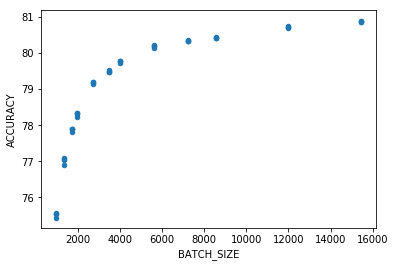

In [86]:
f_mnist_overlap.loc[f_mnist_overlap.loc[:, "COMM_PERIOD"].isin([1, 10, 20, 100]), ["BATCH_SIZE", "ACCURACY"]].plot(kind="scatter", x="BATCH_SIZE", y="ACCURACY")

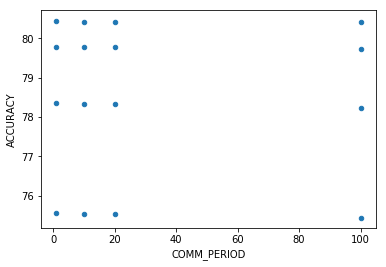

In [87]:
condition = (f_mnist_overlap.loc[:, "OVERLAP"] == 0.0) & (f_mnist_overlap.loc[:, "COMM_PERIOD"].isin([1, 10, 20, 100]))
f_mnist_overlap.loc[condition, ["COMM_PERIOD", "ACCURACY"]].plot(kind="scatter", y="ACCURACY", x="COMM_PERIOD")